## Observations and Insights 

In [324]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
metadata_results_merge = pd.merge(mouse_metadata, study_results, how='inner',on='Mouse ID')
# Display the data table for preview
metadata_results_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [325]:
# Checking the number of mice.
mice_number = metadata_results_merge['Mouse ID'].count()
mice_number

1893

In [326]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Mouse_Timepoint_dup = metadata_results_merge[metadata_results_merge.duplicated(['Mouse ID', 'Timepoint'])]
Mouse_Timepoint_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [327]:
# Optional: Get all the data for the duplicate mouse ID. 
Mouse_dup = metadata_results_merge[metadata_results_merge.duplicated(['Mouse ID'])]
Mouse_dup


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [328]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_Results = metadata_results_merge.drop_duplicates("Mouse ID")
Clean_Results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [329]:
# Checking the number of mice in the clean DataFrame.
Mice_In_Clean = Clean_Results['Mouse ID'].count()
Mice_In_Clean

249

## Summary Statistics

In [330]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = metadata_results_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = metadata_results_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = metadata_results_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = metadata_results_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = metadata_results_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [331]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_df.aggregate(['sum'])

,Mean,Median,Variance,Standard Deviation,SEM
sum,509.761444,499.429596,477.083455,68.09671,4.996406


## Bar and Pie Charts

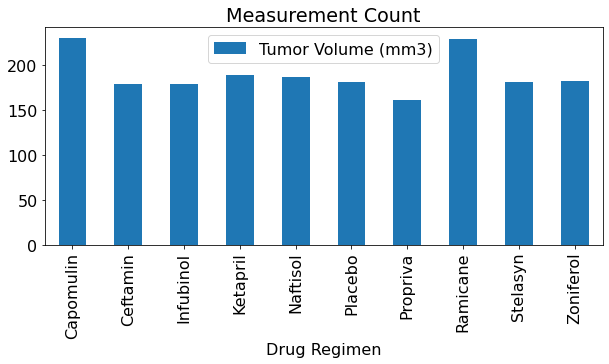

<Figure size 576x504 with 0 Axes>

In [332]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_data = pd.DataFrame(metadata_results_merge.groupby(["Drug Regimen"]).count()).reset_index()
drugs_df = drug_data[["Drug Regimen", "Tumor Volume (mm3)"]]
drugs_df = drugs_df.set_index("Drug Regimen")
drugs_df.plot(kind="bar", figsize=(10,4))
plt.title("Measurement Count")
plt.show()
plt.tight_layout()



Text(0, 0.5, 'Count')

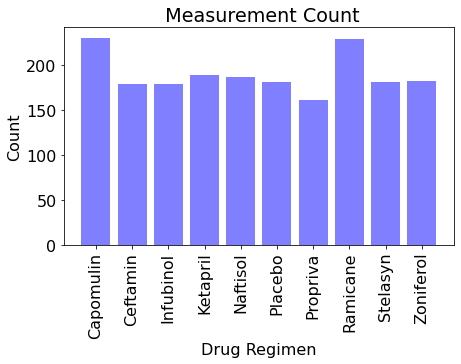

In [333]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs_index = drugs_df.index
tumor_count = (metadata_results_merge.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].count())

#Creating and customizing bar chart
x_axis = np.arange(len(tumor_count))
x_axis = drugs_index
plt.figure(figsize=(7,4))
plt.bar(x_axis, tumor_count, color='b', alpha=0.5, align="center")
plt.xticks(x_axis, drugs_index, rotation="vertical")
plt.title(" Measurement Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")



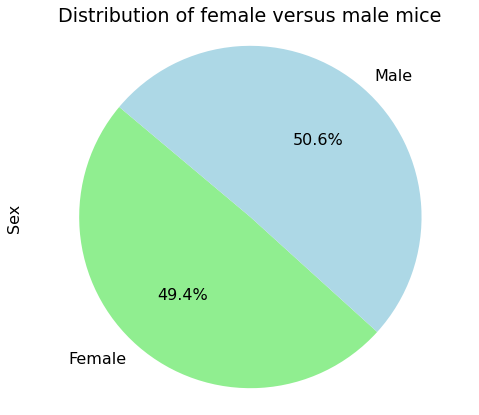

In [334]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_pie = metadata_results_merge.groupby('Sex')

gender_pie_count = pd.DataFrame(gender_pie['Sex'].count())

gender_pie_count.plot(kind='pie', y='Sex', \
                        title="Distribution of female versus male mice",startangle=140,\
                        autopct='%1.1f%%',shadow=False, fontsize=16, colors =["lightgreen","lightblue"],legend =False)
# Make the axis equal to avoid plotting an egg shaped pie chart
plt.axis("equal")
plt.show()


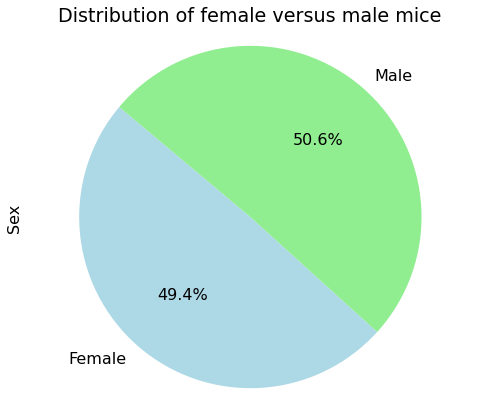

In [335]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_py = list(gender_pie_count.index.values)

gender_py_counts = gender_pie_count['Sex']

Colors = ["lightblue", "lightgreen"]

plt.pie(gender_py_counts, labels=gender_py, colors=Colors,
        autopct="%1.1f%%", shadow=False, startangle=140)
plt.rcParams['font.size'] = 16
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [336]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_regimens_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_regimens = metadata_results_merge[metadata_results_merge['Drug Regimen'].isin(four_regimens_list)]
four_regimens


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [337]:
# Start by getting the last (greatest) timepoint for each mouse
last_four_timepoint = four_regimens.groupby(['Drug Regimen', 'Mouse ID']).agg(\
   timepoint_size = ('Tumor Volume (mm3)', lambda x: x.iloc[-1])).round(2) #Use lambda to independently add tumor volume to the dataframe
    
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_four_timepoint


timepoint_size
Drug Regimen Mouse ID                
Capomulin    b128               38.98
             b742               38.94
             f966               30.49
             g288               37.07
             g316               40.16
...                               ...
Ramicane     s508               30.28
             u196               40.67
             w678               43.17
             y449               44.18
             z578               30.64

[100 rows x 1 columns]

In [338]:
# Reshape dataframe with Drug Regimen as columns by using unstack, also move Last_tumor_size to index using stack
last_four_timepoint_unstack = last_four_timepoint.stack(level=0).unstack(level=0)
# View the result to confirm transpose
last_four_timepoint_unstack.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,timepoint_size,NaN,NaN,67.97,NaN
a251,timepoint_size,NaN,NaN,65.53,NaN
a275,timepoint_size,NaN,63.0,NaN,NaN
a411,timepoint_size,NaN,NaN,NaN,38.41
a444,timepoint_size,NaN,NaN,NaN,43.05


In [339]:
# Set counter to 0 which is used to only print dividing line at top of output
counter = 0

# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
# Do quartile calculations for each drug
for regimen in four_regimens_list:
    quartiles = last_four_timepoint_unstack[regimen].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Check if it is the first time through the for loop, if so then print dividing line at top only
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{regimen} IQR data is:")
    print(f"The lower quartile of {regimen} is: {lowerq}")
    print(f"The upper quartile of {regimen} is: {upperq}")
    print(f"The interquartile range of {regimen} is: {iqr}")
    print(f"The the median of {regimen} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {regimen} could be outliers.")
    print(f"Values above {upper_bound} for {regimen} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.13 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.17 
Values below 36.83 for Infubinol could be outliers.


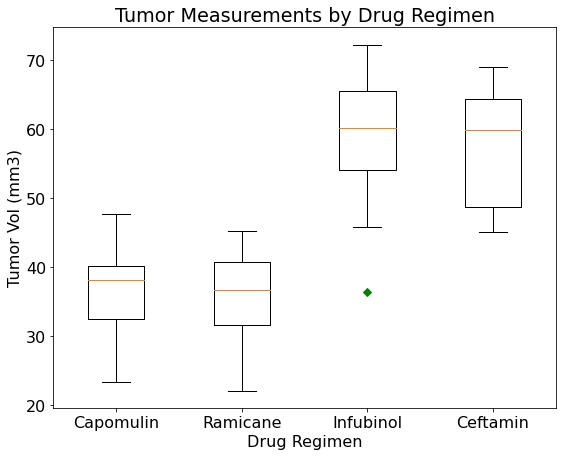

In [340]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Create list of lists containing each column in transposed table simultaneously removing NaN values

# Create an empty list
boxplot_list = []

# Iterate through the list of the four drugs names using them to select the same column names
# and appending to the boxplot_list
for regimen in four_regimens_list:
    boxplot_list.append(list(last_four_timepoint_unstack[regimen].dropna())) 
    
# Plot the list of lists using a boxplot utilizing the same y-axis for all plots
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Tumor Measurements by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplot_list,notch=0,sym='gD')
plt.xticks([1,2,3,4],four_regimens_list)
plt.show()

## Line and Scatter Plots

In [341]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Create a dataframe for only the Capomulin data
capomulin_data = metadata_results_merge.loc[metadata_results_merge['Drug Regimen'] == 'Capomulin']

# View the dataframe
capomulin_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [342]:
# sem just for kicks (since no scientist would plot a line graph without error bars)

timepoint_cap = capomulin_data.groupby(['Timepoint']).agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)

# View the groupby dataframe 
timepoint_cap.head()

,Tumor_Vol_Mean,Tumor_Vol_SEM
Timepoint,,
0,45.000,0.000
5,44.266,0.449
10,43.084,0.703
15,42.064,0.839
20,40.716,0.910


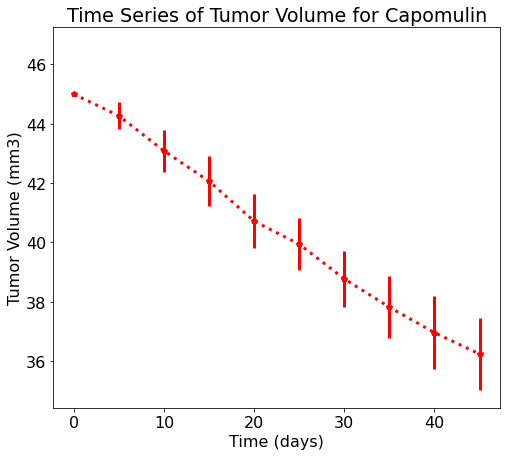

In [343]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Plot a line plot using error bars

# get the values for the x axis
timepoint_scatter = list(timepoint_cap.index.values)

# Use errorbar plot from matplotlib
plt.errorbar(
    timepoint_scatter,  # X values
    timepoint_cap['Tumor_Vol_Mean'], # Y values
    yerr=timepoint_cap['Tumor_Vol_SEM'],     # Y-errors
    label="Time Series of Tumor Volume for Capomulin",
    fmt="rp:", # format line using dashed lines for plot()
    linewidth=3  # width of plot line
    )
# Add the descriptive title, x labels and y labels
plt.title("Time Series of Tumor Volume for Capomulin")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

# Set x and y limits 
plt.xlim(min(timepoint_scatter)-max(time_series)*0.05, max(time_series)*1.05)
plt.ylim(min(timepoint_cap['Tumor_Vol_Mean'])*0.95, max(timepoint_cap['Tumor_Vol_Mean'])*1.05)
plt.rcParams["figure.figsize"] = [8,7]
plt.show()

In [344]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# View Capomulin dataframe
capomulin_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [345]:
# Groupby Mouse ID using .agg() method and get the weight and mean of tumor volume
mouse_id_cap = capomulin_data.groupby(['Mouse ID']).agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Mouse_weight=('Weight (g)', np.mean),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_vol_mean=('Tumor Volume (mm3)', np.mean)\
).round(3)
mouse_id_cap.head()

,Mouse_weight,Tumor_vol_mean
Mouse ID,,
b128,22,41.964
b742,21,40.084
f966,17,36.506
g288,19,41.990
g316,22,44.613


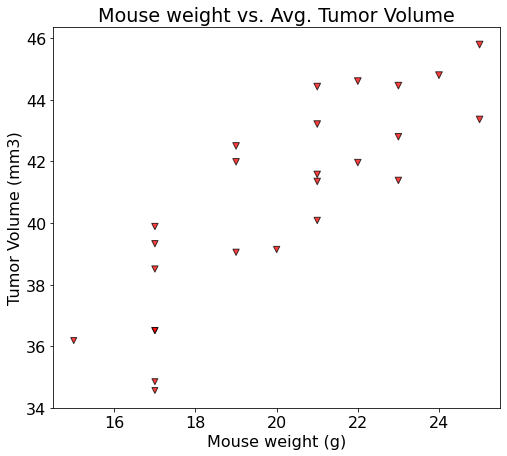

In [346]:
#create scatter plot from the above dataframe
plt.scatter(
    mouse_id_cap['Mouse_weight'],
    mouse_id_cap['Tumor_vol_mean'],
    marker='v',
    facecolors='red',
    edgecolors='black',
    s=cap_mouse_id['Tumor_vol_mean'],
    alpha=.75)

# Create a title, x label, and y label for our chart
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [347]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_mouse_id['Mouse_weight'],mouse_id_cap['Tumor_vol_mean'])
print(f"The correlation between both factors is {(correlation[0]):.2}")

The correlation between both factors is 0.84


The r-squared is: 0.84
The equation of the regression line is: y = 0.95x + 21.55


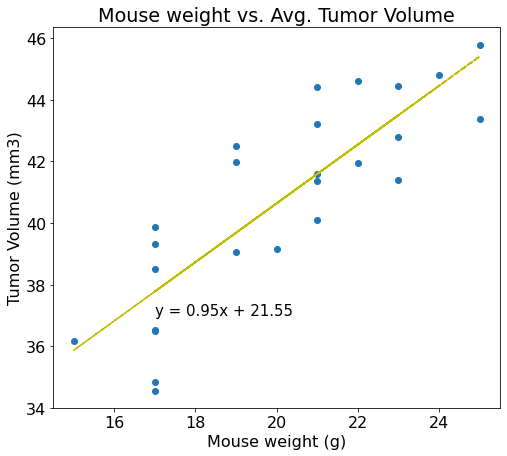

In [348]:
# for mouse weight and average tumor volume for the Capomulin regimen
# Print out the r-squared value along with the plot.
x_values = mouse_id_cap['Mouse_weight']
y_values = mouse_id_cap['Tumor_vol_mean']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"y--")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {(rvalue):.2}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()